# Libraries

In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm_notebook

In [2]:
%matplotlib widget

______________

# Neural network

In [3]:
#Neural network
class Dense:
    def __init__(self, input_size, output_size, weight_initialization_range=(-0.5, 0.5), bias_initialization_range=(-0.5, 0.5)):
        self.weights = np.random.uniform(weight_initialization_range[0], weight_initialization_range[1], size=(output_size, input_size))   
        self.biases = np.random.uniform(bias_initialization_range[0], bias_initialization_range[1], size=(output_size, 1))    

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.biases 

    def backward(self, output_gradient, learning_rate):     
        weights_gradient = np.dot(output_gradient, self.input.T)
        biases_gradient = output_gradient
        input_gradient = np.dot(self.weights.T, output_gradient)
        
        self.weights -= learning_rate * weights_gradient
        self.biases -= learning_rate * biases_gradient
        return input_gradient

class Sigmoid:
    def forward(self, input):
        self.output = 1 / (1 + np.exp(-input))
        return self.output

    def backward(self, output_gradient, learning_rate):
        sig_derivative =  self.output * (1 - self.output)
        return output_gradient * sig_derivative

class Tanh:
    def forward(self, input):
        self.output = np.tanh(input)
        return self.output

    def backward(self, output_gradient, learning_rate):
        tanh_derivative = (1 - self.output ** 2)
        return output_gradient * tanh_derivative

class Relu:
    def forward(self, input):
        self.output = np.maximum(0, self.input)
        return self.output
    
    def backward(self, output_gradient, learning_rate):
        relu_derivative =  (self.output > 0)
        return output_gradient * relu_derivative

class NeuralNetwork:
    def __init__(self, network):
        self.network = network
        self.error_history = []

    @staticmethod
    def mse(y_true, y_pred):
        error = np.mean(np.power(y_true - y_pred, 2))
        return error

    @staticmethod
    def mse_derivative(y_true, y_pred):
        return 2 * (y_pred - y_true) / np.size(y_true)

    @staticmethod
    def exp_decay(epoch, input_learning_rate, exp_decay_k):
        output_learning_rate = input_learning_rate * np.exp(-epoch*exp_decay_k)
        return output_learning_rate

    def predict(self, input_data):
        output = input_data
        for layer in self.network:
            output = layer.forward(output)
        return output

    def fit(self, x_train, y_train, learning_rate=0.01, max_iterations=1000, LRS=False, exp_decay_k=0.01, exp_decay_t=10):
        self.learning_rate_history = []
        self.learning_rate = learning_rate

        for epoch in tqdm_notebook(range(max_iterations), desc='Training'):
            error = 0
            for x, y in zip(x_train, y_train):
                output = self.predict(x)
                error += self.mse(y, output)
                grad = self.mse_derivative(y, output)
                
                for layer in reversed(self.network):
                    grad = layer.backward(grad, learning_rate)
                    
            error /= np.size(x_train)
            self.error_history.append(error)
        
            if LRS and epoch % exp_decay_t == 0:
                self.learning_rate_history.append(learning_rate)
                learning_rate = self.exp_decay(epoch, learning_rate, exp_decay_k)

________________

# f(x) = sin(x)/x

Training:   0%|          | 0/5000 [00:00<?, ?it/s]

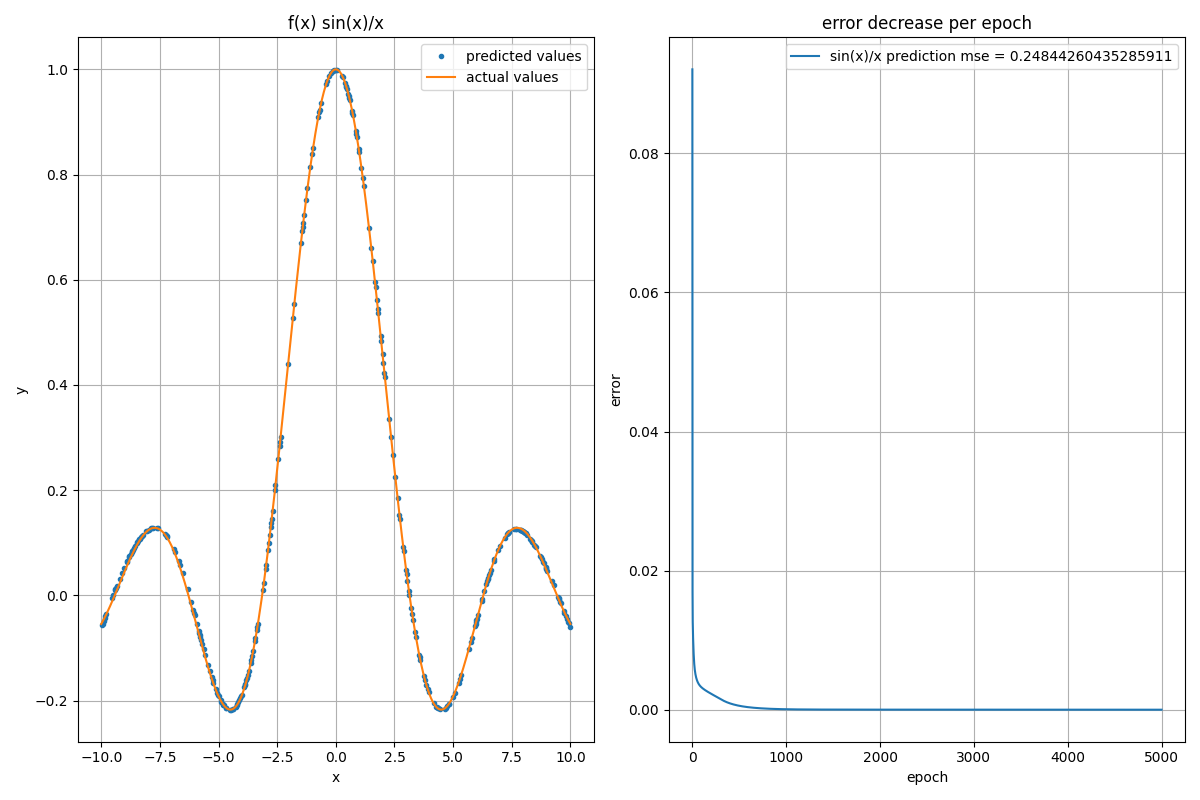

In [23]:
# f(x) = sin(x)/x

#Creating data
x = np.linspace(-10, 10, 1000)
y = (np.sin(x)/x)

x_train_sin, x_test_sin, y_train_sin, y_true_sin = train_test_split(x, y, test_size=0.3, random_state=42)

x_train_sin = np.reshape(x_train_sin, (np.size(x_train_sin), 1, 1))
y_train_sin = np.reshape(y_train_sin, (np.size(y_train_sin), 1, 1))

#Training and predicting
NN_sin = NeuralNetwork([Dense(1, 10), Tanh(), Dense(10, 10), Tanh(), Dense(10, 1)])
NN_sin.fit(x_train_sin, y_train_sin, learning_rate=0.005, max_iterations=5000)

y_pred_sin = []
for point in x_test_sin:
    y_pred_sin.append(NN_sin.predict(point))
y_pred_sin = np.array(y_pred_sin).ravel()

val_sin = NN_sin.mse(y_train_sin, y_pred_sin)

#plotting predictions
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(x_test_sin, y_pred_sin, '.', label='predicted values')
plt.plot(x, y, label='actual values')
plt.title('f(x) sin(x)/x')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.legend()

#plotting error history
errors_sin = NN_sin.error_history
x_plot_sin = np.linspace(0, len(errors_sin), len(errors_sin))

plt.subplot(1, 2, 2)
plt.plot(x_plot_sin, errors_sin, label=f"sin(x)/x prediction mse = {val_sin}")
plt.title('error decrease per epoch')
plt.ylabel('error')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

_____________

# f(x, y) = sin(x) + cos(y)

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

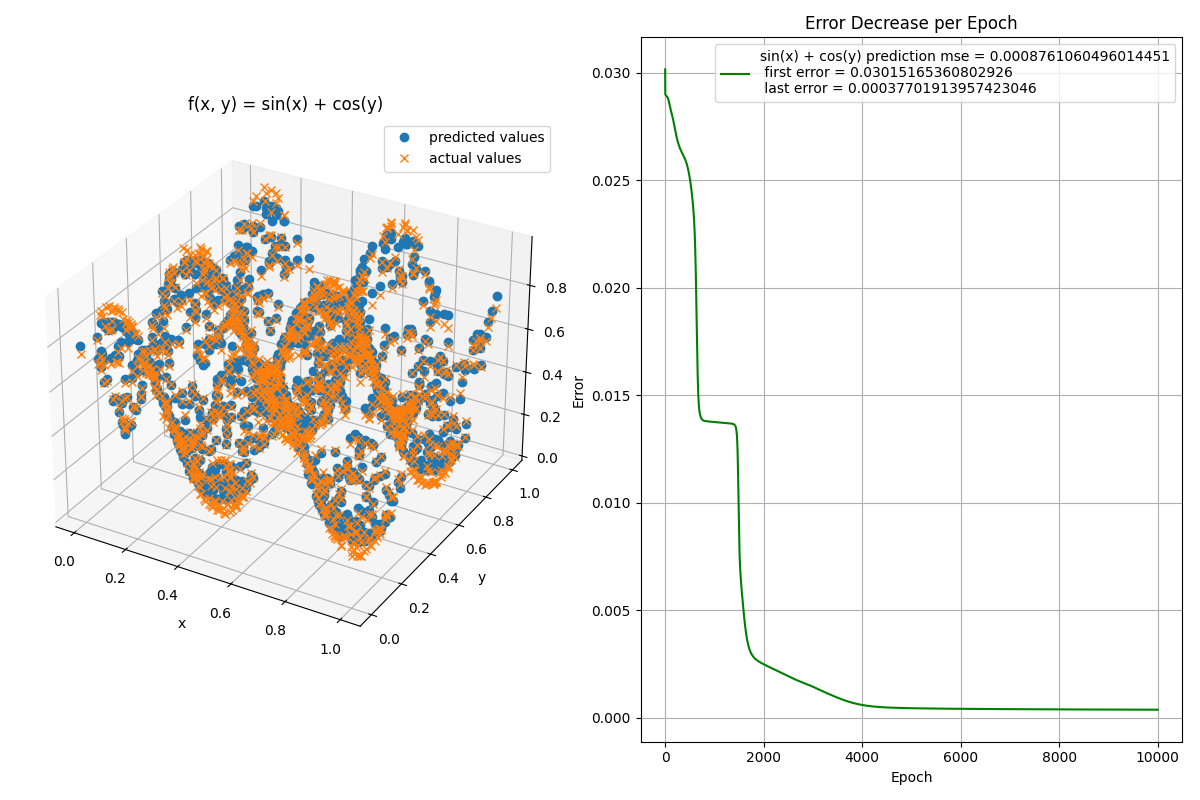

In [12]:
# f(x, y) = sin(x) + cos(y)

# Generate random data
x = np.random.uniform(-2*np.pi, 2*np.pi, 1000)
y = np.random.uniform(-2*np.pi, 2*np.pi, 1000)

xy = np.vstack((x, y)).T 
z = np.sin(x) + np.cos(y)

# Split data into train and test sets
xy_train, xy_test, z_train, z_test = train_test_split(xy, z, test_size=0.3, random_state=42)

# min max scaling
min_vals = xy_train.min(axis=0)
max_vals = xy_train.max(axis=0)

xy_train_scaled = (xy_train - min_vals) / (max_vals - min_vals)
xy_test_scaled = (xy_test - min_vals) / (max_vals - min_vals)

min_z = z_train.min()
max_z = z_train.max()

z_train_scaled = (z_train - min_z) / (max_z - min_z)
z_test_scaled = (z_test - min_z) / (max_z - min_z)

xy_train_sc = np.reshape(xy_train_scaled, (xy_train_scaled.shape[0], xy_train_scaled.shape[1], 1))
z_train_sc = np.reshape(z_train_scaled, (np.size(z_train_scaled), 1, 1))
z_true_sc = np.reshape(z_test_scaled, (np.size(z_test_scaled), 1))

#Training and predicting
NN_sc = NeuralNetwork([Dense(2, 12, (0, 1), (0, 1)), Sigmoid(), Dense(12, 1, (0, 1), (0, 1)), Sigmoid()])
NN_sc.fit(xy_train_scaled, z_train_scaled, learning_rate=0.1, max_iterations=1000)

z_pred_sc = []
for point in xy_test_scaled:
    z_pred_sc.append(NN_sc.predict([[point[0]], [point[1]]]))
z_pred_sc = np.array(z_pred_sc).ravel()
val_sc = NN_sc.mse(z_test_scaled, z_pred_sc)

#Plotting predictions
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(1,2,1, projection='3d')

ax1.plot(xy_test_scaled[:,0], xy_test_scaled[:,1], z_pred_sc, 'o', label='prdicted values')
ax1.plot(x, y, z, 'x', label='actual values') 
         
ax1.set_title('f(x, y) = sin(x) + cos(y)')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
ax1.grid()
ax1.legend()

#Plotting error history
errors_sc = NN_sc.error_history
x_plot_sc = np.linspace(0, len(errors_sc), len(errors_sc))

ax2 = fig.add_subplot(1,2,2)
ax2.plot(x_plot_sc, errors_sc, c='green', label=f"sin(x)+cos(y) prediction mse = {val_sc}\n first error = {errors_sc[0]}\n last error = {errors_sc[-1]}")
ax2.set_title('error decrease per epoch')
ax2.set_ylabel('error')
ax2.set_xlabel('epoch')
ax2.grid()
ax2.legend()

plt.tight_layout()
plt.show()

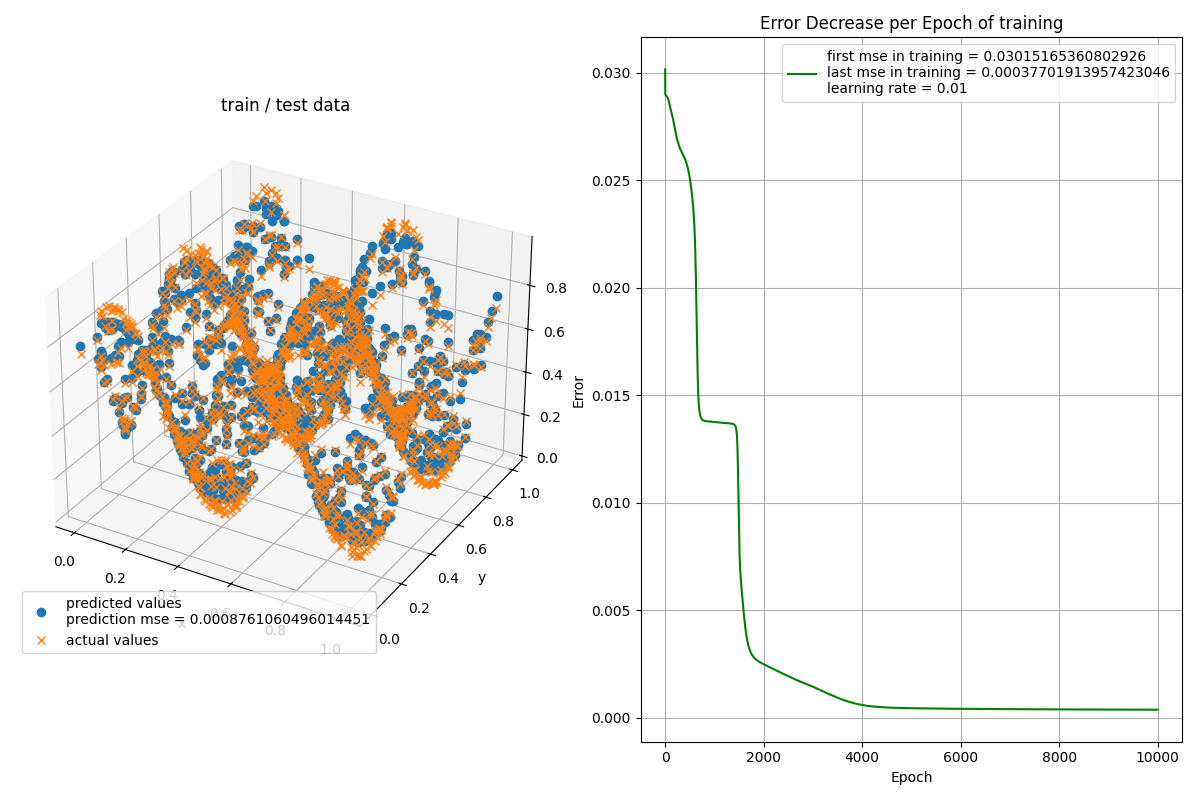

In [21]:
# Plotting predictions
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')

ax1.plot(xy_test_scaled[:, 0], xy_test_scaled[:, 1], z_pred_sc.ravel(), 'o', label=f'predicted values\nprediction mse = {val_sc}')
ax1.plot(xy_test_scaled[:, 0], xy_test_scaled[:, 1], z_test_scaled, 'x', label='actual values') 

ax1.set_title('train / test data')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
ax1.grid()
ax1.legend()

# Plotting error history
errors_sc = NN_sc.error_history
x_plot_sc = np.linspace(0, len(errors_sc), len(errors_sc))

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(x_plot_sc, errors_sc, c='green', label=f"first mse in training = {errors_sc[0]}\nlast mse in training = {errors_sc[-1]}\nlearning rate = 0.01")
ax2.set_title('Error Decrease per Epoch of training')
ax2.set_ylabel('Error')
ax2.set_xlabel('Epoch')
ax2.grid()
ax2.legend()

plt.tight_layout()
plt.show()

______________

Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Training:   0%|          | 0/1000 [00:00<?, ?it/s]

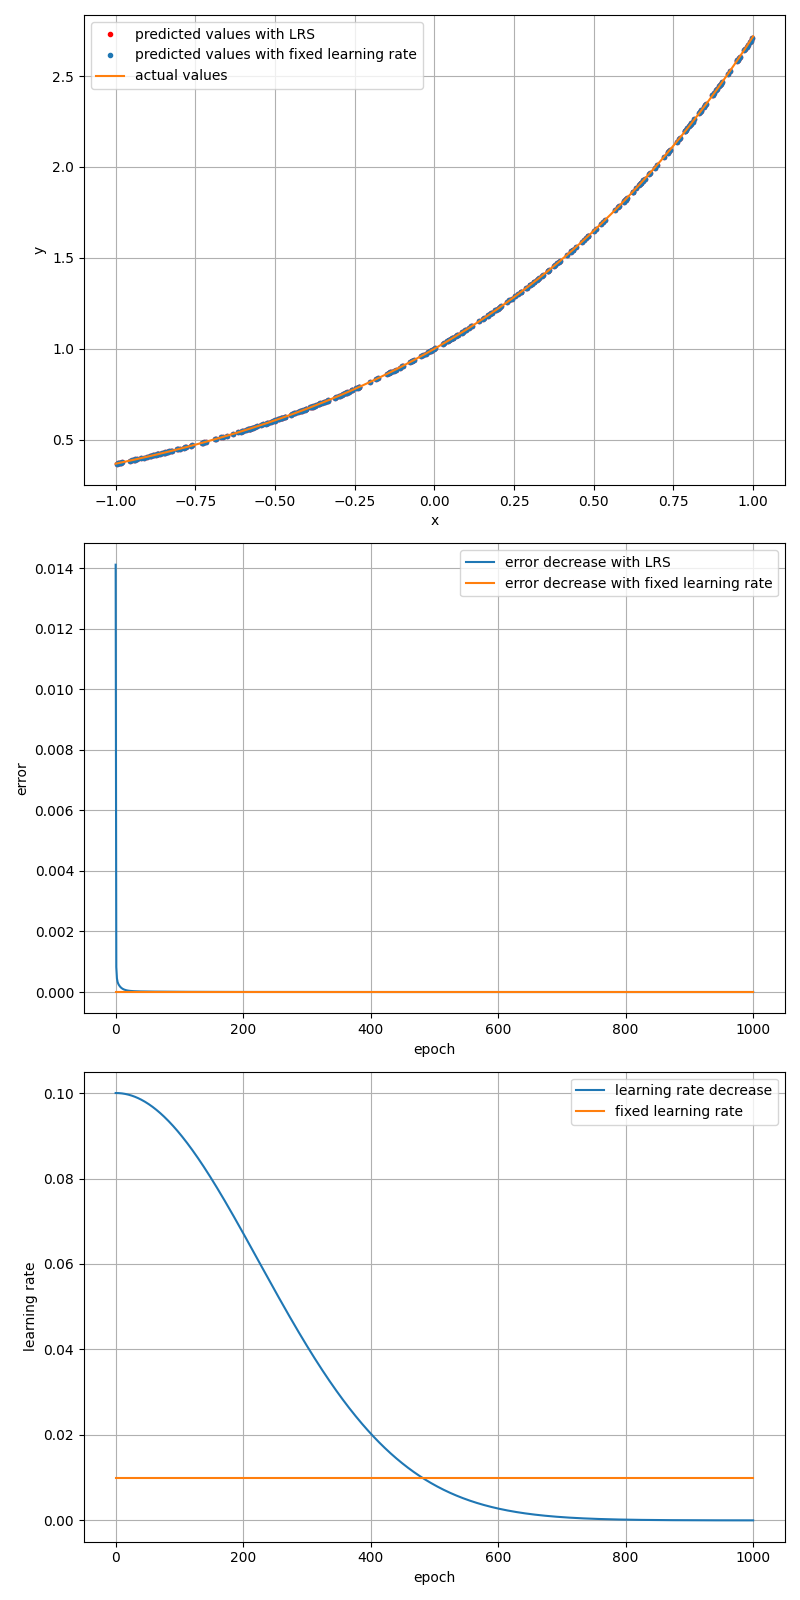

In [ ]:
#Learning rate with exponential decay for e^x

# Creating data
x = np.linspace(-1, 1, 1000)
y = np.exp(x)

x_train_LRS, x_test_LRS, y_train_LRS, y_true_LRS = train_test_split(x, y, test_size=0.3, random_state=42)

x_train_LRS = np.reshape(x_train_LRS, (np.size(x_train_LRS), 1, 1))
y_train_LRS = np.reshape(y_train_LRS, (np.size(y_train_LRS), 1, 1))

# Training and predicting
network = [Dense(1, 10), Tanh(), Dense(10, 10), Tanh(), Dense(10, 1)]
i = 1000
fixed_lr = 0.01

NN_exp_LRS = NeuralNetwork(network)
NN_exp_LRS.fit(x_train_LRS, y_train_LRS, learning_rate=0.1, max_iterations=i, LRS=True, exp_decay_k=20e-6, exp_decay_t=1)

NN_exp = NeuralNetwork(network)
NN_exp.fit(x_train_LRS, y_train_LRS, learning_rate=fixed_lr, max_iterations=i)

y_pred_exp_LRS = []
y_pred_exp = []

for point in x_test_LRS:
    y_pred_exp_LRS.append(NN_exp_LRS.predict(point))
    y_pred_exp.append(NN_exp.predict(point))

y_pred_exp_LRS = np.array(y_pred_exp_LRS).ravel()
y_pred_exp = np.array(y_pred_exp).ravel()

val_exp_LRS = NN_exp_LRS.mse(y_true_LRS, y_pred_exp_LRS)
val_exp = NN_exp.mse(y_true_LRS, y_pred_exp)


# Plotting predictions
plt.figure(figsize=(8,16))
plt.subplot(3, 1, 1)

plt.plot(x_test_LRS, y_pred_exp_LRS, '.', c='red', label='predicted values with LRS')
plt.plot(x_test_LRS, y_pred_exp, '.', label='predicted values with fixed learning rate')
plt.plot(x, y, label='actual values')

plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.legend()

# Plotting error decrease
plt.subplot(3, 1, 2)
errors_exp_LRS = NN_exp_LRS.error_history
errors_exp = NN_exp.error_history
x_plot = np.linspace(0, len(errors_exp_LRS), len(errors_exp_LRS))

plt.plot(x_plot, errors_exp_LRS, label='error decrease with LRS')
plt.plot(x_plot, errors_exp, label='error decrease with fixed learning rate')

plt.ylabel('error')
plt.xlabel('epoch')
plt.grid()
plt.legend()

# Plotting learning rate decrease
plt.subplot(3, 1, 3)

lr_decrease = NN_exp_LRS.learning_rate_history
x_plot_LRS = np.linspace(0, len(lr_decrease), len(lr_decrease))
lr_plot = np.full(len(lr_decrease), fixed_lr)

plt.plot(x_plot_LRS, lr_decrease, label='learning rate decrease')
plt.plot(x_plot_LRS, lr_plot, label='fixed learning rate')

plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

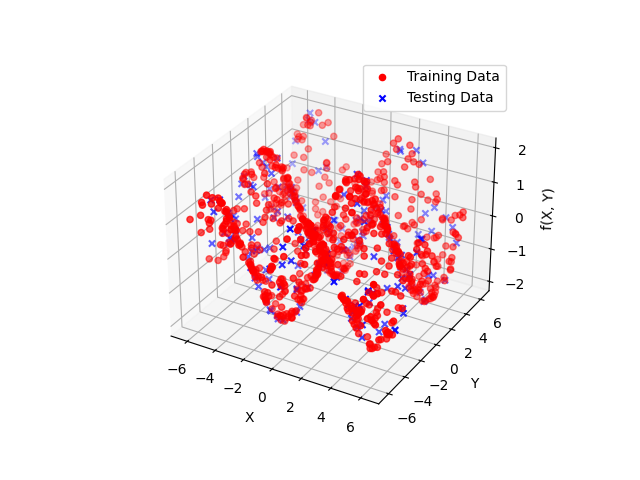

In [ ]:
import numpy as np

# Define the range for x and y
x_min, x_max = (-2*np.pi, 2*np.pi)
y_min, y_max = -2*np.pi, 2*np.pi

# Define the number of data points
num_samples = 1000

# Generate random values for x and y


# Calculate function outputs
labels = np.sin(x_values) + np.cos(y_values)

# Add optional noise
# labels += np.random.normal(loc=0, scale=0.1, size=num_samples)

# Split data into training and testing sets
train_ratio = 0.8
num_train_samples = int(train_ratio * num_samples)

x_train, x_test = x_values[:num_train_samples], x_values[num_train_samples:]
y_train, y_test = y_values[:num_train_samples], y_values[num_train_samples:]
labels_train, labels_test = labels[:num_train_samples], labels[num_train_samples:]

# Optionally, visualize the data
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train, y_train, labels_train, c='r', marker='o', label='Training Data')
ax.scatter(x_test, y_test, labels_test, c='b', marker='x', label='Testing Data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
plt.legend()
plt.show()
